In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data
df = pd.read_csv('resources/DATA.csv')

# Target Columns
target_columns = [
    'HN',
    'HNE',
    'HE',
    'HSE',
    'HS',
    'HSW',
    'HW',
    'HNW',
    'MN',
    'MNE',
    'ME',
    'MSE',
    'MS',
    'MSW',
    'MW',
    'MNW',
    'LN',
    'LNE',
    'LE',
    'LSE',
    'LS',
    'LSW',
    'LW',
    'LNW'
]

# Convert colors to numbers
map = {
    'gray': 0,
    'green': 1,
    'yellow': 2,
    'orange': 3,
    'red': 4,
    'black': 5,    
}

# For target columns
for col in target_columns:
    df[col] = df[col].map(map)

# Make a new column be the max risk of the target columns
df['max_risk'] = df[target_columns].max(axis=1)
target_columns += ['max_risk']

###
df['avg_risk'] = df[target_columns].mean(axis=1)
target_columns += ['avg_risk']
###
    
input_columns = [
    'ALTA_Precip_(tenths_mm)',
    'ALTA_Snowfall_(mm)',
    'ALTA_Snow_Depth_(mm)',
    'ALTA_Max_Temp_(tenths_C)',
    'ALTA_Min_Temp_(tenths_C)',
    'ALTA_Multiday_Prec_Days',
    'ALTA_Multiday_Snowfall_Days',
    'ALTA_Multiday_Prec_Days_(tenths_mm)',
    'ALTA_Multiday_Snowfall',
    'ALTA_Temp_at_Observation_(tenths_C)',
    'ALTA_Fog_Ice_Fog',
    'ALTA_Heavy_Fog_Freezing_Fog',
    'ALTA_Ice_Pellets_Sleet',
    'ALTA_Hail',
    'ALTA_Glaze_Rime',
    'ALTA_Weather_Type_07',
    'ALTA_Smoke_Haze',
    'ALTA_Blowing_Drifting_Snow',
    'ALTA_High_Winds',
    'ALTA_Snow_Pellets_Ice_Crystals',
    'BRIGHTON_Precip_(tenths_mm)',
    'BRIGHTON_Snow_Depth_(mm)',
    'BRIGHTON_Max_Temp_(tenths_C)',
    'BRIGHTON_Min_Temp_(tenths_C)',
    'BRIGHTON_Avg_Daily_Temp_(tenths_C)',
    'BRIGHTON_Temp_at_Observation_(tenths_C)',
    'BRIGHTON_Snow_on_Ground_(tenths_mm)',
    'THAYNES_Precip_(tenths_mm)',
    'THAYNES_Snow_Depth_(mm)',
    'THAYNES_Max_Temp_(tenths_C)',
    'THAYNES_Min_Temp_(tenths_C)',
    'THAYNES_Avg_Daily_Temp_(tenths_C)',
    'THAYNES_Temp_at_Observation_(tenths_C)',
    'THAYNES_Snow_on_Ground_(tenths_mm)',
    'PARLEY_SUMMIT_Precip_(tenths_mm)',
    'PARLEY_SUMMIT_Snow_Depth_(mm)',
    'PARLEY_SUMMIT_Max_Temp_(tenths_C)',
    'PARLEY_SUMMIT_Min_Temp_(tenths_C)',
    'PARLEY_SUMMIT_Temp_at_Observation_(tenths_C)',
    'PARLEY_SUMMIT_Snow_on_Ground_(tenths_mm)'
]

# add data from previous day
for col in target_columns:
    input_columns.append(col + '_prev')
    df[col + '_prev'] = df[col].shift(1)

# Fill NA with 0
df = df.fillna(0)

X = df[input_columns]
y = df['max_risk']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
df.columns

Index(['DATE', 'url', 'HN', 'HNE', 'HE', 'HSE', 'HS', 'HSW', 'HW', 'HNW',
       ...
       'LN_prev', 'LNE_prev', 'LE_prev', 'LSE_prev', 'LS_prev', 'LSW_prev',
       'LW_prev', 'LNW_prev', 'max_risk_prev', 'avg_risk_prev'],
      dtype='object', length=208)

In [13]:
# seperate the df by year and graph the max risk over averaged across years
df['date'] = pd.to_datetime(df['DATE'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.dayofyear

# Convert 'max_risk' column to numeric data type
df['max_risk'] = pd.to_numeric(df['max_risk'])

# get an average value for max_risk for each day of the year
df_year = df.groupby(['day_of_year']).mean()
df_year.plot(y='max_risk')

TypeError: agg function failed [how->mean,dtype->object]

In [98]:
df.shape

(1543, 208)

In [60]:
# what would be the accuracy if we just guessed the most common value?
print('Most common value:', y.value_counts().idxmax())
print('Accuracy if we just guessed the most common value:', y.value_counts().max() / y.value_counts().sum())

# accuracy if we did previous day == today
print('Accuracy if we just guessed the previous day:', (y == X['max_risk_prev']).sum() / len(y))


Most common value: 2
Accuracy if we just guessed the most common value: 0.39792611795204147
Accuracy if we just guessed the previous day: 0.6604018146467919


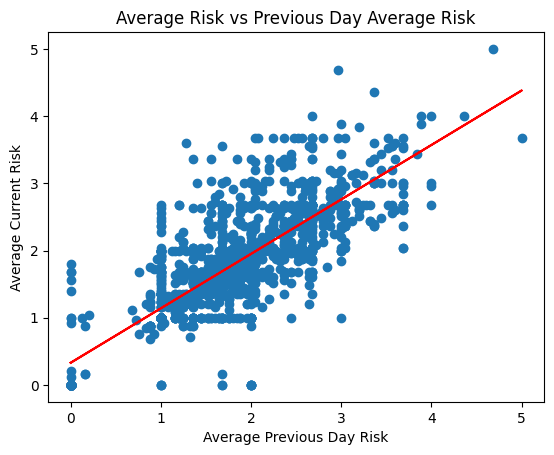

R2: 0.6203004759096992


In [87]:
# graph risk vs previous day
import matplotlib.pyplot as plt

# make the dots smaller

plt.scatter(df['avg_risk_prev'], df['avg_risk'])
plt.title('Average Risk vs Previous Day Average Risk')
plt.xlabel('Average Previous Day Risk')
plt.ylabel('Average Current Risk')
# fit a line
m, b = np.polyfit(df['avg_risk_prev'], df['avg_risk'], 1)
plt.plot(df['avg_risk_prev'], m*df['avg_risk_prev'] + b, color='red')
plt.show()

# what is r2
from sklearn.metrics import r2_score
print('R2:', r2_score(df['avg_risk'], df['avg_risk_prev']))


In [54]:
print('X_train shape:', X_train.shape)

X_train shape: (1234, 65)


In [ ]:
print('')

# Classifiers

In [4]:
results = {}

In [5]:
# Just for my own curiosity I'll run a few quick models
# MLP, Decision Tree, KNN
# MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

mlp_accuracies = {}
params250 = [(250, 250, 250), (250, 250, 250, 250), (250, 250, 250, 250, 250), (250, 250, 250, 250, 250, 250), (250, 250, 250, 250, 250, 250, 250)]
params100 = [(100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100, 100)]
params32 = [(32, 32, 32), (32, 32, 32, 32), (32, 32, 32, 32, 32), (32, 32, 32, 32, 32, 32)]
params10 = [(10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10)]
params = params100 + params32 + params10
for param in params:
    mlp = MLPClassifier(hidden_layer_sizes=param, early_stopping=True, max_iter=1000)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    mlp_accuracies[param] = accuracy_score(y_test, y_pred)
    results[('MLPClassifer', param)] = {
        'model': mlp,
        'accuracy': accuracy_score(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred)
    }
    
# Print baseline accuracy
print("Baseline: ", y_test.value_counts().max() / len(y_test)) 

# Print MLP accuracies
print("Max: ", max(mlp_accuracies, key=mlp_accuracies.get), mlp_accuracies[max(mlp_accuracies, key=mlp_accuracies.get)])
# for param in params:
#     print(param, mlp_accuracies[param])

Baseline:  0.39158576051779936
Max:  (100, 100, 100, 100, 100) 0.5080906148867314


In [6]:

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_accuracies = {}
params = range(1, 20)
for param in params:
    dt = DecisionTreeClassifier(max_depth=param)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    dt_accuracies[param] = accuracy_score(y_test, y_pred)
    results[('DecisionTreeClassifier', param)] = {
        'model': dt,
        'accuracy': accuracy_score(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred)
    }

# Print Decision Tree accuracies
print("Max: ", max(dt_accuracies, key=dt_accuracies.get), dt_accuracies[max(dt_accuracies, key=dt_accuracies.get)])
# for param in params:
#     print(param, dt_accuracies[param])

Max:  4 0.6796116504854369


In [7]:

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_accuracies = {}
params = range(1, 20)
for param in params:
    knn = KNeighborsClassifier(n_neighbors=param)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_accuracies[param] = accuracy_score(y_test, y_pred)
    results[('KNeighborsClassifier', param)] = {
        'model': knn,
        'accuracy': accuracy_score(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred)
    }
    
# Print KNN accuracies
print("Max: ", max(knn_accuracies, key=knn_accuracies.get), knn_accuracies[max(knn_accuracies, key=knn_accuracies.get)])
# for param in params:
#     print(param, knn_accuracies[param])

Max:  4 0.6213592233009708


In [8]:

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_accuracies = {}
params = range(1, 20)
for param in params:
    rf = RandomForestClassifier(max_depth=param)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_accuracies[param] = accuracy_score(y_test, y_pred)
    results[('RandomForestClassifier', param)] = {
        'model': rf,
        'accuracy': accuracy_score(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred)
    }
    
# Print Random Forest accuracies
print("Max: ", max(rf_accuracies, key=rf_accuracies.get), rf_accuracies[max(rf_accuracies, key=rf_accuracies.get)])
# for param in params:
#     print(param, rf_accuracies[param])

Max:  13 0.6990291262135923


In [9]:

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_accuracies = {}
params = range(5, 6)
for param in params:
    gb = GradientBoostingClassifier(max_depth=param)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    gb_accuracies[param] = accuracy_score(y_test, y_pred)
    results[('GradientBoostingClassifier', param)] = {
        'model': gb,
        'accuracy': accuracy_score(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred)
    }
    
# Print Gradient Boosting accuracies
print("Max: ", max(gb_accuracies, key=gb_accuracies.get), gb_accuracies[max(gb_accuracies, key=gb_accuracies.get)])
# for param in params:
#     print(param, gb_accuracies[param])

Max:  5 0.6925566343042071


In [10]:

# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ab_accuracies = {}
params = range(1, 20)
for param in params:
    ab = AdaBoostClassifier(n_estimators=param)
    ab.fit(X_train, y_train)
    y_pred = ab.predict(X_test)
    ab_accuracies[param] = accuracy_score(y_test, y_pred)
    results[('AdaBoostClassifier', param)] = {
        'model': ab,
        'accuracy': accuracy_score(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred)
    }
    
# Print AdaBoost accuracies
print("Max: ", max(ab_accuracies, key=ab_accuracies.get), ab_accuracies[max(ab_accuracies, key=ab_accuracies.get)])
# for param in params:
#     print(param, ab_accuracies[param])

Max:  2 0.5792880258899676


In [52]:

# XGBoost Classifier
from xgboost import XGBClassifier

xgb_accuracies = {}
params = range(1, 20)
for param in params:
    xgb = XGBClassifier(max_depth=param)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    xgb_accuracies[param] = accuracy_score(y_test, y_pred)
    results[('XGBClassifier', param)] = {
        'model': xgb,
        'accuracy': accuracy_score(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred)
    }
    
# Print XGBoost accuracies
print("Max: ", max(xgb_accuracies, key=xgb_accuracies.get), xgb_accuracies[max(xgb_accuracies, key=xgb_accuracies.get)])
# for param in params:
#     print(param, xgb_accuracies[param])

Max:  16 0.6925566343042071


In [12]:

# SVM Classifier
from sklearn.svm import SVC

svm_accuracies = {}
params = range(1, 20)
for param in params:
    svm = SVC(C=param)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    svm_accuracies[param] = accuracy_score(y_test, y_pred)
    results[('SVC', param)] = {
        'model': svm,
        'accuracy': accuracy_score(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred)
    }
    
# Print SVM accuracies
print("Max: ", max(svm_accuracies, key=svm_accuracies.get), svm_accuracies[max(svm_accuracies, key=svm_accuracies.get)])
# for param in params:
#     print(param, svm_accuracies[param])

Max:  15 0.540453074433657


In [13]:

# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

lr_accuracies = {}
#‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’
params = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

# preprocess X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pX_train = scaler.fit_transform(X_train)
pX_test = scaler.transform(X_test)

for param in params:
    lr = LogisticRegression(solver=param, max_iter=10000)
    lr.fit(pX_train, y_train)
    y_pred = lr.predict(pX_test)
    lr_accuracies[param] = accuracy_score(y_test, y_pred)
    results[('LogisticRegression', param)] = {
        'model': lr,
        'accuracy': accuracy_score(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred)
    }
    
# Print Logistic Regression accuracies
print("Max: ", max(lr_accuracies, key=lr_accuracies.get), lr_accuracies[max(lr_accuracies, key=lr_accuracies.get)])
# for param in params:
#     print(param, lr_accuracies[param])

Max:  lbfgs 0.6828478964401294


In [14]:

# Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred)
results[('GaussianNB', '')] = {
    'model': gnb,
    'accuracy': accuracy_score(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred)
}
    
# Print Gaussian Naive Bayes accuracies
print(gnb_accuracy)
# for param in params:
#     print(param, gnb_accuracies[param])


0.56957928802589


# Regressors

In [15]:

# Regressors
# MLP Regressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlpr_mse = {}
mlpr_accuracy = {}
params250 = [(250, 250, 250), (250, 250, 250, 250), (250, 250, 250, 250, 250), (250, 250, 250, 250, 250, 250), (250, 250, 250, 250, 250, 250, 250)]
params100 = [(100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100, 100)]
params32 = [(32, 32, 32), (32, 32, 32, 32), (32, 32, 32, 32, 32), (32, 32, 32, 32, 32, 32)]
params10 = [(10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10)]
params = params100 + params32 + params10
for param in params:
    mlpr = MLPRegressor(hidden_layer_sizes=param, early_stopping=True, max_iter=1000)
    mlpr.fit(X_train, y_train)
    y_pred = mlpr.predict(X_test)
    mlpr_mse[param] = mean_squared_error(y_test, y_pred)
    mlpr_accuracy[param] = accuracy_score(y_test, y_pred.round())
    results[('MLPRegressor', param)] = {
        'model': mlpr,
        'accuracy': accuracy_score(y_test, y_pred.round()),
        'mse': mean_squared_error(y_test, y_pred)
    }

# Print MLP Regressor accuracies
print("Min: ", min(mlpr_mse, key=mlpr_mse.get), mlpr_mse[min(mlpr_mse, key=mlpr_mse.get)])
print("Max: ", max(mlpr_accuracy, key=mlpr_accuracy.get), mlpr_accuracy[max(mlpr_accuracy, key=mlpr_accuracy.get)])

Min:  (10, 10, 10, 10, 10, 10) 0.4319073471307426
Max:  (10, 10, 10, 10, 10, 10) 0.56957928802589


In [16]:

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dtr_mse = {}
dtr_accuracy = {}
params = range(1, 20)
for param in params:
    dtr = DecisionTreeRegressor(max_depth=param)
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    dtr_mse[param] = mean_squared_error(y_test, y_pred)
    dtr_accuracy[param] = accuracy_score(y_test, y_pred.round())
    results[('DecisionTreeRegressor', param)] = {
        'model': dtr,
        'accuracy': accuracy_score(y_test, y_pred.round()),
        'mse': mean_squared_error(y_test, y_pred)
    }
    
# Print Decision Tree Regressor accuracies
print("Min: ", min(dtr_mse, key=dtr_mse.get), dtr_mse[min(dtr_mse, key=dtr_mse.get)])
print("Max: ", max(dtr_accuracy, key=dtr_accuracy.get), dtr_accuracy[max(dtr_accuracy, key=dtr_accuracy.get)])

Min:  4 0.3556212033952159
Max:  7 0.6828478964401294


In [17]:

# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

knr_mse = {}
knr_accuracy = {}
params = range(1, 20)
params2 = ['euclidean', 'manhattan', 'chebyshev']

for param in params:
    for param2 in params2:
        knr = KNeighborsRegressor(n_neighbors=param, metric=param2)
        knr.fit(X_train, y_train)
        y_pred = knr.predict(X_test)
        knr_mse[(param, param2)] = mean_squared_error(y_test, y_pred)
        knr_accuracy[(param, param2)] = accuracy_score(y_test, y_pred.round())
        results[('KNeighborsRegressor', (param, param2))] = {
            'model': knr,
            'accuracy': accuracy_score(y_test, y_pred.round()),
            'mse': mean_squared_error(y_test, y_pred)
        }
        
# Print KNN Regressor accuracies
print("Min: ", min(knr_mse, key=knr_mse.get), knr_mse[min(knr_mse, key=knr_mse.get)])
print("Max: ", max(knr_accuracy, key=knr_accuracy.get), knr_accuracy[max(knr_accuracy, key=knr_accuracy.get)])

Min:  (4, 'euclidean') 0.3948220064724919
Max:  (3, 'manhattan') 0.6440129449838188


In [18]:

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfr_mse = {}
rfr_accuracy = {}
params = range(1, 20)
for param in params:
    rfr = RandomForestRegressor(max_depth=param)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_test)
    rfr_mse[param] = mean_squared_error(y_test, y_pred)
    rfr_accuracy[param] = accuracy_score(y_test, y_pred.round())
    results[('RandomForestRegressor', param)] = {
        'model': rfr,
        'accuracy': accuracy_score(y_test, y_pred.round()),
        'mse': mean_squared_error(y_test, y_pred)
    }
    
# Print Random Forest Regressor accuracies
print("Min: ", min(rfr_mse, key=rfr_mse.get), rfr_mse[min(rfr_mse, key=rfr_mse.get)])
print("Max: ", max(rfr_accuracy, key=rfr_accuracy.get), rfr_accuracy[max(rfr_accuracy, key=rfr_accuracy.get)])

Min:  12 0.2996365749387768
Max:  9 0.6796116504854369


In [50]:

# XGBoost Regressor
from xgboost import XGBRegressor

xgbr_mse = {}
xgbr_accuracy = {}
params = range(1, 20)
for param in params:
    xgbr = XGBRegressor(max_depth=param)
    xgbr.fit(X_train, y_train)
    y_pred = xgbr.predict(X_test)
    xgbr_mse[param] = mean_squared_error(y_test, y_pred)
    xgbr_accuracy[param] = accuracy_score(y_test, y_pred.round())
    results[('XGBRegressor', param)] = {
        'model': xgbr,
        'accuracy': accuracy_score(y_test, y_pred.round()),
        'mse': mean_squared_error(y_test, y_pred)
    }
    
# Print XGBoost Regressor accuracies
print("Min: ", min(xgbr_mse, key=xgbr_mse.get), xgbr_mse[min(xgbr_mse, key=xgbr_mse.get)])
print("Max: ", max(xgbr_accuracy, key=xgbr_accuracy.get), xgbr_accuracy[max(xgbr_accuracy, key=xgbr_accuracy.get)])

Min:  1 0.28099857868383954
Max:  1 0.6731391585760518


In [20]:

# SVM Regressor
from sklearn.svm import SVR

svr_mse = {}
svr_accuracy = {}
params = range(1, 20)

for param in params:
    svr = SVR(C=param)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    svr_mse[param] = mean_squared_error(y_test, y_pred)
    svr_accuracy[param] = accuracy_score(y_test, y_pred.round())
    results[('SVR', param)] = {
        'model': svr,
        'accuracy': accuracy_score(y_test, y_pred.round()),
        'mse': mean_squared_error(y_test, y_pred)
    }
    
# Print SVM Regressor accuracies
print("Min: ", min(svr_mse, key=svr_mse.get), svr_mse[min(svr_mse, key=svr_mse.get)])
print("Max: ", max(svr_accuracy, key=svr_accuracy.get), svr_accuracy[max(svr_accuracy, key=svr_accuracy.get)])

Min:  19 0.47304435401531425
Max:  10 0.5598705501618123


In [21]:
# DO ALL ABOVE, BUT ALGORITHMICALLY
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

models = [
    MLPClassifier,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    XGBClassifier,
    SVC,
    LogisticRegression,
    LinearRegression,
    GaussianNB,
    MLPRegressor,
    DecisionTreeRegressor,
    KNeighborsRegressor,
    RandomForestRegressor,
    XGBRegressor,
    SVR
]

model_accuracies = {}
model_mses = {}

# give parameter options for each model
params = {
    MLPClassifier: [(250, 250, 250), (250, 250, 250, 250), (250, 250, 250, 250, 250), (250, 250, 250, 250, 250, 250), (250, 250, 250, 250, 250, 250, 250),
                    (100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100, 100),
                    (32, 32, 32), (32, 32, 32, 32), (32, 32, 32, 32, 32), (32, 32, 32, 32, 32, 32),
                    (10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10)],
    DecisionTreeClassifier: range(1, 20),
    KNeighborsClassifier: range(1, 20),
    RandomForestClassifier: range(1, 20),
    GradientBoostingClassifier: range(1, 20),
    AdaBoostClassifier: range(1, 20),
    XGBClassifier: range(1, 20),
    SVC: range(1, 20),
    LogisticRegression: ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    LinearRegression: None,
    GaussianNB: None,
    MLPRegressor: [(250, 250, 250), (250, 250, 250, 250), (250, 250, 250, 250, 250), (250, 250, 250, 250, 250, 250, 250),
                    (100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100, 100),
                    (32, 32, 32), (32, 32, 32, 32), (32, 32, 32, 32, 32), (32, 32, 32, 32, 32, 32),
                    (10, 10, 10), (10, 10, 10, 10), (10, 10, 10, 10, 10)],
    DecisionTreeRegressor: range(1, 20),
    KNeighborsRegressor: range(1, 20),
    RandomForestRegressor: range(1, 20),
    XGBRegressor: range(1, 20),
    SVR: range(1, 20)
}

other_params = {
    MLPClassifier: {'early_stopping': True, 'max_iter': 1000},
    DecisionTreeClassifier: {},
    KNeighborsClassifier: {},
    RandomForestClassifier: {},
    GradientBoostingClassifier: {},
    AdaBoostClassifier: {},
    XGBClassifier: {},
    SVC: {},
    LogisticRegression: {'max_iter': 10000},
    LinearRegression: {},
    GaussianNB: {},
    MLPRegressor: {'early_stopping': True, 'max_iter': 1000},
    DecisionTreeRegressor: {},
    KNeighborsRegressor: {},
    RandomForestRegressor: {},
    XGBRegressor: {},
    SVR: {}
}
    

model_preprocess = {
    MLPClassifier: None,
    DecisionTreeClassifier: None,
    KNeighborsClassifier: None,
    RandomForestClassifier: None,
    GradientBoostingClassifier: None,
    AdaBoostClassifier: None,
    XGBClassifier: None,
    SVC: None,
    LogisticRegression: StandardScaler(),
    LinearRegression: StandardScaler(),
    GaussianNB: None,
    MLPRegressor: StandardScaler(),
    DecisionTreeRegressor: None,
    KNeighborsRegressor: StandardScaler(),
    RandomForestRegressor: None,
    XGBRegressor: None,
    SVR: None
}

model_names = {
    MLPClassifier: 'MLP Classifier',
    DecisionTreeClassifier: 'Decision Tree Classifier',
    KNeighborsClassifier: 'K Neighbors Classifier',
    RandomForestClassifier: 'Random Forest Classifier',
    GradientBoostingClassifier: 'Gradient Boosting Classifier',
    AdaBoostClassifier: 'Ada Boost Classifier',
    XGBClassifier: 'XGBoost Classifier',
    SVC: 'SVM Classifier',
    LogisticRegression: 'Logistic Regression Classifier',
    LinearRegression: 'Linear Regression',
    GaussianNB: 'Gaussian Naive Bayes Classifier',
    MLPRegressor: 'MLP Regressor',
    DecisionTreeRegressor: 'Decision Tree Regressor',
    KNeighborsRegressor: 'K Neighbors Regressor',
    RandomForestRegressor: 'Random Forest Regressor',
    XGBRegressor: 'XGBoost Regressor',
    SVR: 'SVM Regressor'
}

for model in models:
    print("Model: ", model_names[model])
    model_accuracies[model] = {}
    model_mses[model] = {}
    for param in params[model]:
        print("Param: ", param)
        if model_preprocess[model] is not None:
            pX_train = model_preprocess[model].fit_transform(X_train)
            pX_test = model_preprocess[model].transform(X_test)
        else:
            pX_train = X_train
            pX_test = X_test
        if other_params[model] is not None:
            m = model(**other_params[model], **{'n_neighbors': param})
        else:
            m = model(param)
        m.fit(pX_train, y_train)
        y_pred = m.predict(pX_test)
        if model in [LinearRegression, GaussianNB]:
            model_mses[model][param] = mean_squared_error(y_test, y_pred)
        else:
            model_accuracies[model][param] = accuracy_score(y_test, y_pred.round())
            model_mses[model][param] = mean_squared_error(y_test, y_pred)
    print("Max Accuracy: ", max(model_accuracies[model], key=model_accuracies[model].get), model_accuracies[model][max(model_accuracies[model], key=model_accuracies[model].get)])
    print("Min MSE: ", min(model_mses[model], key=model_mses[model].get), model_mses[model][min(model_mses[model], key=model_mses[model].get)])
    print("")

Model:  MLP Classifier
Param:  (250, 250, 250)


TypeError: MLPClassifier.__init__() got an unexpected keyword argument 'n_neighbors'

In [22]:
# Print results
for key in results:
    print(key, results[key]['accuracy'], results[key]['mse'])

('MLPClassifer', (100, 100, 100)) 0.43042071197411 0.8802588996763754
('MLPClassifer', (100, 100, 100, 100)) 0.44660194174757284 1.0258899676375404
('MLPClassifer', (100, 100, 100, 100, 100)) 0.5080906148867314 0.912621359223301
('MLPClassifer', (100, 100, 100, 100, 100, 100)) 0.41423948220064727 1.3527508090614886
('MLPClassifer', (100, 100, 100, 100, 100, 100, 100)) 0.5016181229773463 0.7411003236245954
('MLPClassifer', (32, 32, 32)) 0.42718446601941745 1.064724919093851
('MLPClassifer', (32, 32, 32, 32)) 0.5016181229773463 0.7961165048543689
('MLPClassifer', (32, 32, 32, 32, 32)) 0.36245954692556637 1.1359223300970873
('MLPClassifer', (32, 32, 32, 32, 32, 32)) 0.4336569579288026 1.197411003236246
('MLPClassifer', (10, 10, 10)) 0.2686084142394822 1.9838187702265373
('MLPClassifer', (10, 10, 10, 10)) 0.2459546925566343 2.679611650485437
('MLPClassifer', (10, 10, 10, 10, 10)) 0.28802588996763756 2.55663430420712
('MLPClassifer', (10, 10, 10, 10, 10, 10)) 0.31715210355987056 1.443365695

In [23]:
# Highest accuracy
accuracies = []
mses = []

for key in results:
    accuracies.append((key, results[key]['accuracy']))
    mses.append((key, results[key]['mse']))
    
    
print("Max Accuracy: ", max(accuracies, key=lambda x: x[1]))
print("Min MSE: ", min(mses, key=lambda x: x[1]))


Max Accuracy:  (('RandomForestClassifier', 13), 0.6990291262135923)
Min MSE:  (('XGBRegressor', 1), 0.28099857868383954)


In [88]:
import pandas as pd
df = pd.DataFrame.from_dict(results, orient='index')

In [64]:
df.head()

model  \
MLPClassifer (100, 100, 100)                      MLPClassifier(early_stopping=True, hidden_laye...   
             (100, 100, 100, 100)                 MLPClassifier(early_stopping=True, hidden_laye...   
             (100, 100, 100, 100, 100)            MLPClassifier(early_stopping=True, hidden_laye...   
             (100, 100, 100, 100, 100, 100)       MLPClassifier(early_stopping=True,\n          ...   
             (100, 100, 100, 100, 100, 100, 100)  MLPClassifier(early_stopping=True,\n          ...   

                                                  accuracy       mse  
MLPClassifer (100, 100, 100)                      0.430421  0.880259  
             (100, 100, 100, 100)                 0.446602  1.025890  
             (100, 100, 100, 100, 100)            0.508091  0.912621  
             (100, 100, 100, 100, 100, 100)       0.414239  1.352751  
             (100, 100, 100, 100, 100, 100, 100)  0.501618  0.741100

In [49]:
df.to_csv('results.csv')

In [96]:
# sort by highest accuracy
df = df.sort_values(by=['mse'], ascending=True)
df[0:5]

model  \
XGBRegressor          1   XGBRegressor(base_score=None, booster=None, ca...   
                      2   XGBRegressor(base_score=None, booster=None, ca...   
RandomForestRegressor 12  (DecisionTreeRegressor(max_depth=12, max_featu...   
                      13  (DecisionTreeRegressor(max_depth=13, max_featu...   
                      18  (DecisionTreeRegressor(max_depth=18, max_featu...   

                          accuracy       mse  
XGBRegressor          1   0.673139  0.280999  
                      2   0.663430  0.293604  
RandomForestRegressor 12  0.666667  0.299637  
                      13  0.669903  0.302417  
                      18  0.669903  0.303471

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data
df = pd.read_csv('resources/DATA.csv')

# Target Columns
target_columns = [
    'HN',
    'HNE',
    'HE',
    'HSE',
    'HS',
    'HSW',
    'HW',
    'HNW',
    'MN',
    'MNE',
    'ME',
    'MSE',
    'MS',
    'MSW',
    'MW',
    'MNW',
    'LN',
    'LNE',
    'LE',
    'LSE',
    'LS',
    'LSW',
    'LW',
    'LNW'
]

# Convert colors to numbers
map = {
    'gray': 0,
    'green': 1,
    'yellow': 2,
    'orange': 3,
    'red': 4,
    'black': 5,    
}

# For target columns
for col in target_columns:
    df[col] = df[col].map(map)

# Make a new column be the max risk of the target columns
df['max_risk'] = df[target_columns].max(axis=1)
target_columns += ['max_risk']

###
df['avg_risk'] = df[target_columns].mean(axis=1)
target_columns += ['avg_risk']
###
    
input_columns = [
    'ALTA_Precip_(tenths_mm)',
    'ALTA_Snowfall_(mm)',
    'ALTA_Snow_Depth_(mm)',
    'ALTA_Max_Temp_(tenths_C)',
    'ALTA_Min_Temp_(tenths_C)',
    'ALTA_Multiday_Prec_Days',
    'ALTA_Multiday_Snowfall_Days',
    'ALTA_Multiday_Prec_Days_(tenths_mm)',
    'ALTA_Multiday_Snowfall',
    'ALTA_Temp_at_Observation_(tenths_C)',
    'ALTA_Fog_Ice_Fog',
    'ALTA_Heavy_Fog_Freezing_Fog',
    'ALTA_Ice_Pellets_Sleet',
    'ALTA_Hail',
    'ALTA_Glaze_Rime',
    'ALTA_Weather_Type_07',
    'ALTA_Smoke_Haze',
    'ALTA_Blowing_Drifting_Snow',
    'ALTA_High_Winds',
    'ALTA_Snow_Pellets_Ice_Crystals',
    'BRIGHTON_Precip_(tenths_mm)',
    'BRIGHTON_Snow_Depth_(mm)',
    'BRIGHTON_Max_Temp_(tenths_C)',
    'BRIGHTON_Min_Temp_(tenths_C)',
    'BRIGHTON_Avg_Daily_Temp_(tenths_C)',
    'BRIGHTON_Temp_at_Observation_(tenths_C)',
    'BRIGHTON_Snow_on_Ground_(tenths_mm)',
    'THAYNES_Precip_(tenths_mm)',
    'THAYNES_Snow_Depth_(mm)',
    'THAYNES_Max_Temp_(tenths_C)',
    'THAYNES_Min_Temp_(tenths_C)',
    'THAYNES_Avg_Daily_Temp_(tenths_C)',
    'THAYNES_Temp_at_Observation_(tenths_C)',
    'THAYNES_Snow_on_Ground_(tenths_mm)',
    'PARLEY_SUMMIT_Precip_(tenths_mm)',
    'PARLEY_SUMMIT_Snow_Depth_(mm)',
    'PARLEY_SUMMIT_Max_Temp_(tenths_C)',
    'PARLEY_SUMMIT_Min_Temp_(tenths_C)',
    'PARLEY_SUMMIT_Temp_at_Observation_(tenths_C)',
    'PARLEY_SUMMIT_Snow_on_Ground_(tenths_mm)'
]

# add data from previous day
for col in target_columns:
    input_columns.append(col + '_prev')
    df[col + '_prev'] = df[col].shift(1)

# Fill NA with 0
df = df.fillna(0)

X = df[input_columns]
y = df['max_risk']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Max:  12 0.6245954692556634


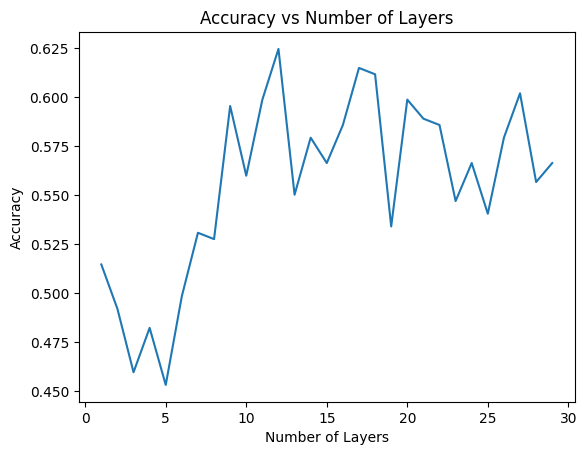

In [ ]:
# perform MLP and graph the accuracy as we increase layers
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

mlp_accuracies = {}
nodes = 128
num_layers = range(1, 30)
for num in num_layers:
    mlp = MLPClassifier(hidden_layer_sizes=(nodes,) * num, early_stopping=True, max_iter=1000, activation='identity')
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    mlp_accuracies[num] = accuracy_score(y_test, y_pred)

# Print MLP accuracies
print("Max: ", max(mlp_accuracies, key=mlp_accuracies.get), mlp_accuracies[max(mlp_accuracies, key=mlp_accuracies.get)])
# for param in params:
#     print(param, mlp_accuracies[param])

# graph the accuracy
plt.plot(num_layers, mlp_accuracies.values())
plt.title('Accuracy vs Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.show()

In [20]:
# Plot Accuracy vs Number of Nodes
mlp_accuracies = {}
num_layers = 12
nodes = range(1, 500, 50)

for num in nodes:
    mlp = MLPClassifier(hidden_layer_sizes=(num,) * num_layers, early_stopping=True, max_iter=1000, activation='identity')
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    mlp_accuracies[num] = accuracy_score(y_test, y_pred)
    
# Print MLP accuracies
print("Max: ", max(mlp_accuracies, key=mlp_accuracies.get), mlp_accuracies[max(mlp_accuracies, key=mlp_accuracies.get)])
# for param in params:
#     print(param, mlp_accuracies[param])

# graph the accuracy
plt.plot(nodes, mlp_accuracies.values())
plt.title('Accuracy vs Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.show()

